In [1]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [3]:
def cvPLS(X, Y, n, k):
    kf = KFold(n_splits=k)
    yTrue = None
    yHat = None
    pls = PLSRegression(n_components=n)  # 取n个独立变量
    for trainIndex, testIndex in kf.split(X):
        Xtrain, Xtest = X[trainIndex], X[testIndex]
        Ytrain, Ytest = Y[trainIndex], Y[testIndex]
        pls.fit(Xtrain, Ytrain)
        ypred = pls.predict(Xtest)
        if yTrue is None:
            yTrue = Ytest
            yHat = ypred
        else:
            yTrue = np.r_[yTrue, Ytest]
            yHat = np.r_[yHat, ypred]
    err = np.sum(np.abs(yTrue - yHat) / np.abs(yTrue)) / len(X)
    return err

In [4]:
X=np.loadtxt(r"X-PI.txt")
Y=np.loadtxt(r"Y-PI.txt")

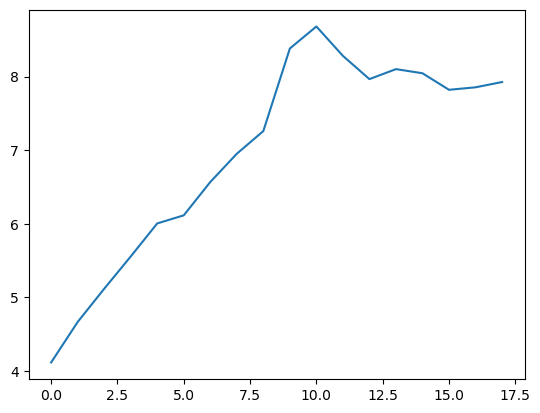

In [9]:
kk = 3
maxPCs = min((X.shape[0]-X.shape[0]//kk,X.shape[1]))
errs = []
for i in range(1, maxPCs):
    errs.append(cvPLS(X, Y, i, kk))

plt.plot(errs)


In [13]:
kf = KFold(n_splits=5)
for trainIndex, testIndex in kf.split(X):
    print(trainIndex, testIndex)

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27] [0 1 2 3 4 5]
[ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27] [ 6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27] [12 13 14 15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 23 24 25 26 27] [18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23 24 25 26 27]


In [14]:
from PCR import PCR

In [15]:
def cvPCR(X, Y, n, k):
    kf = KFold(n_splits=k)
    yTrue = None
    yHat = None
#     pls = PLSRegression(n_components=n)  # 取 n 个独立变量
    for trainIndex, testIndex in kf.split(X):
        Xtrain, Xtest = X[trainIndex], X[testIndex]
        Ytrain, Ytest = Y[trainIndex], Y[testIndex]
        pcr = PCR(Xtrain, Ytrain)
        pcr.confirmPCs()
        pcr.fit(n)
        ypred = pcr.predict(Xtest)
        if yTrue is None:
            yTrue = Ytest
            yHat = ypred
        else:
            yTrue = np.r_[yTrue, Ytest]
            yHat = np.r_[yHat, ypred]
    err = np.sum(np.abs(yTrue - yHat) / np.abs(yTrue)) / len(X)
    return err

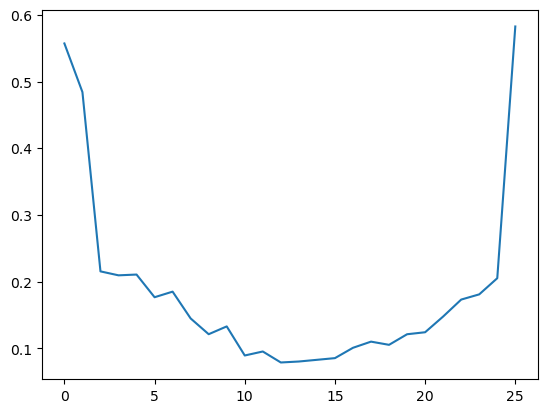

In [21]:
kk = 28
maxPCs = min((X.shape[0]-X.shape[0]//kk,X.shape[1]))
errs = []
for i in range(1, maxPCs):
    errs.append(cvPCR(X, Y, i, kk))

plt.plot(errs)

In [20]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from PCR import PCR
from matplotlib import ticker


def cvPCR(X, Y, n, k):
    kf = KFold(n_splits=k)
    yTrue = None
    yHat = None
    #     pls = PLSRegression(n_components=n)  # 取 n 个独立变量
    for trainIndex, testIndex in kf.split(X):
        Xtrain, Xtest = X[trainIndex], X[testIndex]
        Ytrain, Ytest = Y[trainIndex], Y[testIndex]
        pcr = PCR(Xtrain, Ytrain)
        pcr.confirmPCs()
        pcr.fit(n)
        ypred = pcr.predict(Xtest)
        if yTrue is None:
            yTrue = Ytest
            yHat = ypred
        else:
            yTrue = np.r_[yTrue, Ytest]
            yHat = np.r_[yHat, ypred]
    err = np.sum(np.abs(yTrue - yHat) / np.abs(yTrue)) / len(X)
    return err


X = np.loadtxt(r"X-PI.txt")
Y = np.loadtxt(r"Y-PI.txt")

kk1 = 3
maxPCs1 = min((X.shape[0] - X.shape[0] // kk1, X.shape[1]))
errs1 = []
for i in range(1, maxPCs1):
    errs1.append(cvPCR(X, Y, i, kk1))
kk2 = 8
maxPCs2 = min((X.shape[0] - X.shape[0] // kk2, X.shape[1]))
errs2 = []
for i in range(1, maxPCs2):
    errs2
    .append(cvPCR(X, Y, i, kk2))
print(np.arange(1, maxPCs1).shape, np.array(errs1).shape)
# fig, ax = plt.subplots(figsize=(8, 4), dpi=80)

#  ax.plot(np.arange(1, maxPCs1),
#          errs1,
#          color='C6',
#          label=("n_splits = " + chr(kk1)))
#  ax.scatter(np.arange(1, maxPCs1), errs1, color='C1')
#  ax.plot(np.arange(1, maxPCs2),
#          errs2,
#          color='C6',
#          label='n_splits = ' + chr(kk2))
#  ax.scatter(np.arange(1, maxPCs2), errs2, color='C1')
# ax.legend()
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
# ax.set_xlabel = ("Number of PCs")
# ax.set_ylabel = ("average error")
# ax.set_title("Error - Number of PCs Plot for PCR")
# plt.show()

(18,) (42,)


'\x01'